In [2]:
from typing import Tuple
from numpy.typing import NDArray
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.axes import Axes

plt.style.use("ggplot")

## Simple Hypothesis and Cost Function

In [5]:
def simple_hypothesis(x: NDArray[np.float64], w: float) -> NDArray[np.float64]:
    """
    A simple linear hypothesis function that does not include a bias term in order
    to follow the lecture example.
    """
    return w * x


def cost_function(y: NDArray[np.float64], y_hat: NDArray[np.float64]) -> float:
    """
    As mentioned in the videos, `y_hat` is the prediction and `y` is the actual
    value. The difference between the prediction and the actual value is the error.
    """
    m = y.shape[0]
    return np.sum((y_hat - y) ** 2) / (2 * m)


def plot_simple_error(
    x: NDArray[np.float64],
    y: NDArray[np.float64],
    w_range: NDArray[np.float64],
    x_marker_position: float,
) -> Tuple[Figure, Axes]:

    fig, ax = plt.subplots(figsize=(10, 6))
    errors = np.array([cost_function(y, simple_hypothesis(x, w)) for w in w_range])
    ax.plot(w_range, errors, color="blue", label="J(w)")
    ax.axvline(
        x=x_marker_position,
        color="red",
        linestyle="--",
        label=f"w = {x_marker_position}",
    )
    ax.set_xlabel("w")
    ax.set_ylabel("J(w)")
    ax.set_title("Cost as a function of w - J(w)")
    ax.legend()

    return fig, ax

## Simple Hypothesis and Cost Function: Example

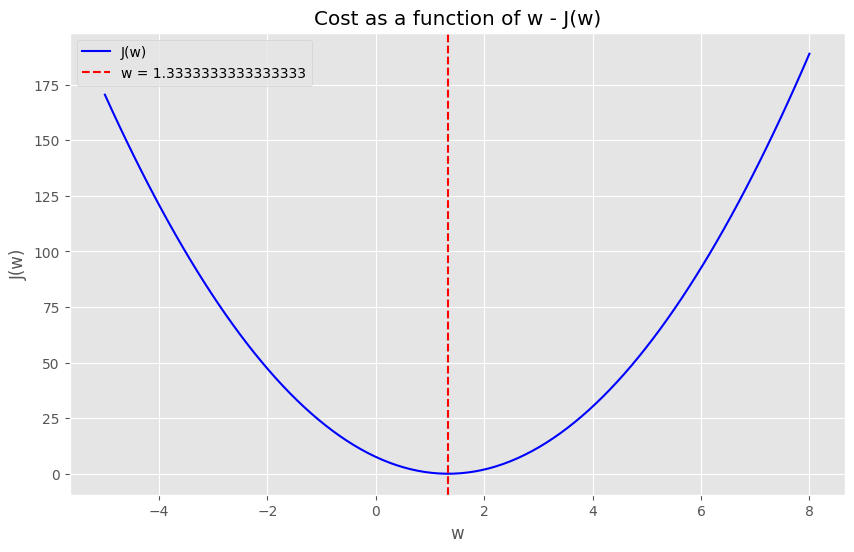

In [6]:
w: float = 4 / 3
x_train = np.linspace(-5, 5, 100)
y_train = simple_hypothesis(x_train, w)
w_sample_range = np.linspace(-5, 8, 100)

fig, ax = plot_simple_error(
    x=x_train, y=y_train, w_range=w_sample_range, x_marker_position=w
)

## Complex Hypothesis and Cost Function

In [4]:
def complex_hypothesis(
    x: NDArray[np.float64], w: float, b: float
) -> NDArray[np.float64]:
    return w * x + b


def plot_complex_error(
    x: NDArray[np.float64],
    y: NDArray[np.float64],
    w_range: NDArray[np.float64],
    b_range: NDArray[np.float64],
) -> Tuple[Figure, Axes]:
    w_mesh, b_mesh = np.meshgrid(w_range, b_range)
    errors = np.array(
        [
            [cost_function(y, complex_hypothesis(x, w, b)) for w in w_range]
            for b in b_range
        ]
    )
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection="3d")
    ax.plot_surface(w_mesh, b_mesh, errors, cmap="viridis")
    ax.set_xlabel("w")
    ax.set_ylabel("b")
    ax.set_zlabel("J(w,b)", labelpad=-30)
    ax.set_title("Cost as a function of w and b - J(w,b)")

    return fig, ax


def plot_complex_error_with_contour(
    x: NDArray[np.float64],
    y: NDArray[np.float64],
    w_range: NDArray[np.float64],
    b_range: NDArray[np.float64],
) -> Tuple[Figure, Axes]:
    w_mesh, b_mesh = np.meshgrid(w_range, b_range)
    errors = np.array(
        [
            [cost_function(y, complex_hypothesis(x, w, b)) for w in w_range]
            for b in b_range
        ]
    )
    fig, ax = plt.subplots(figsize=(10, 6))
    contour = ax.contourf(w_mesh, b_mesh, errors, levels=20, cmap="viridis")

    ax.set_xlabel("w")
    ax.set_ylabel("b")
    ax.set_title("Cost as a function of w and b - J(w,b)")

    fig.colorbar(contour, ax=ax, label="Cost")

    return fig, ax

## Complex Hypothesis and Cost Function: Example

In [ ]:
w = 2.5
b = -1.5
x_train = np.linspace(-5, 5, 100)
y_train = complex_hypothesis(x_train, w, b)
w_sample_range = np.linspace(-5, 5, 100)
b_sample_range = np.linspace(-5, 5, 100)

fig, ax = plot_complex_error(
    x=x_train, y=y_train, w_range=w_sample_range, b_range=b_sample_range
)

fig, ax = plot_complex_error_with_contour(
    x=x_train, y=y_train, w_range=w_sample_range, b_range=b_sample_range
)